<a href="https://colab.research.google.com/github/fendiirfan/Fuzzy-Logic---Tupro-AI/blob/main/Tupro_AI_Fuzzy_Logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

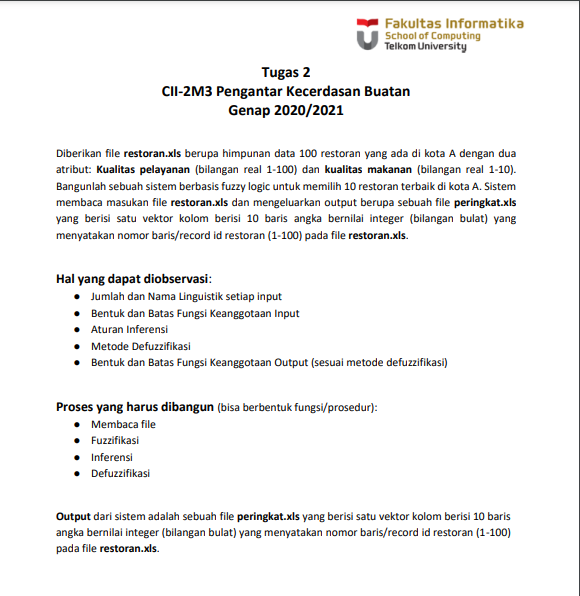

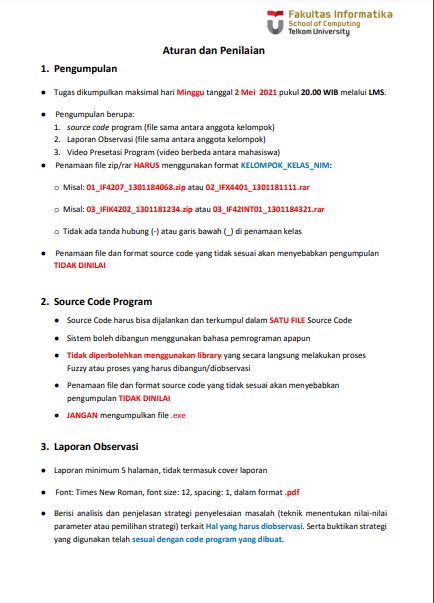

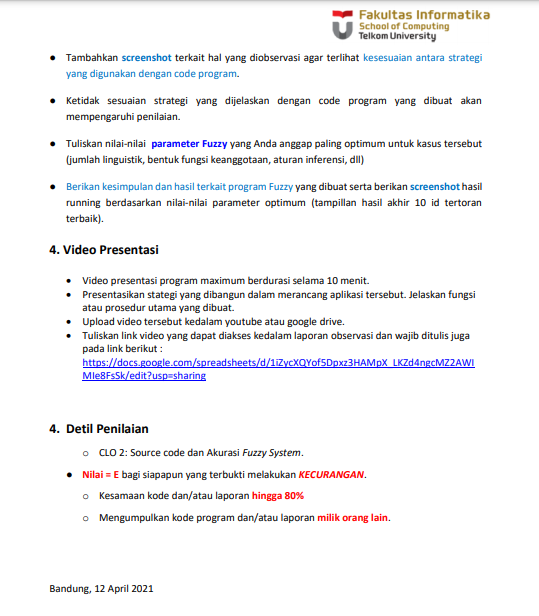

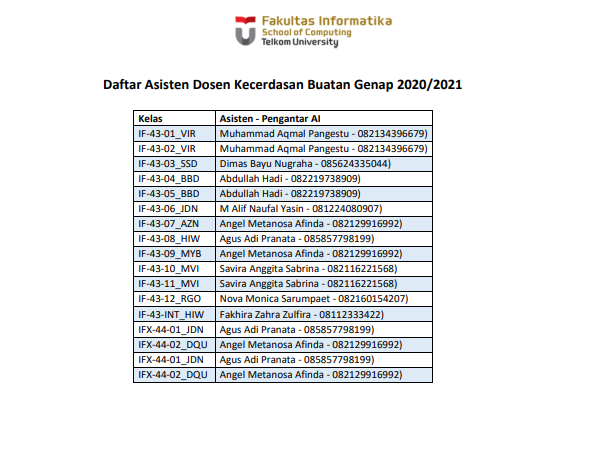

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('https://github.com/fendiirfan/Fuzzy-Logic---Tupro-AI/blob/main/restoran.xlsx?raw=true')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         100 non-null    int64
 1   pelayanan  100 non-null    int64
 2   makanan    100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


In [ ]:
df

,id,pelayanan,makanan
0,1,58,7
1,2,54,1
2,3,98,2
3,4,52,4
4,5,11,4
...,...,...,...
95,96,30,1
96,97,25,3
97,98,27,10
98,99,8,6


In [ ]:
df.describe()

,id,pelayanan,makanan
count,100.000000,100.000000,100.00000
mean,50.500000,42.240000,5.42000
std,29.011492,26.701916,3.00901
min,1.000000,3.000000,1.00000
25%,25.750000,20.750000,3.00000
50%,50.500000,39.000000,5.00000
75%,75.250000,61.000000,8.00000
max,100.000000,100.000000,10.00000


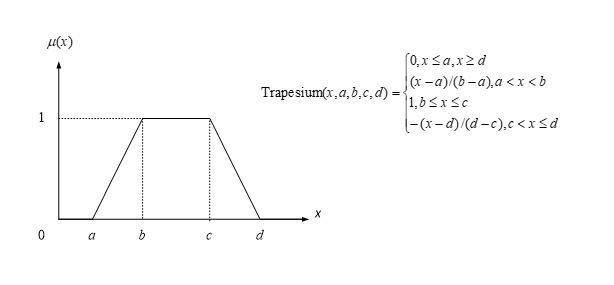

In [ ]:
#dalam fungsi dibawah ini akan menghitung nilai x berdasarkan rumus diatas
def ruanganAB(a,b,x):
  return (x-a)/(b-a)
def ruanganCD(c,d,x):
  return -(x-d)/(d-c)

In [ ]:
def fuzzyfikasi(x_kepuasan_layanan,x_kualitas_makanan):

  if x_kepuasan_layanan < 60:
    dataKepuasanLayanan = [['Tidak Puas',1.0]]
  elif x_kepuasan_layanan >=60 and x_kepuasan_layanan <=65:
    dataKepuasanLayanan = [['Tidak Puas',ruanganCD(60,65,x_kepuasan_layanan)],['Cukup Puas',ruanganAB(60,65,x_kepuasan_layanan)]]
  elif x_kepuasan_layanan >65 and x_kepuasan_layanan <70:
    dataKepuasanLayanan = [['Cukup Puas',1.0]]
  elif x_kepuasan_layanan >=70 and x_kepuasan_layanan <=75:
    dataKepuasanLayanan = [['Cukup Puas',ruanganCD(70,75,x_kepuasan_layanan)],['Puas',ruanganAB(70,75,x_kepuasan_layanan)]]
  elif x_kepuasan_layanan >75 and x_kepuasan_layanan <85:
    dataKepuasanLayanan = [['Puas',1.0]]
  elif x_kepuasan_layanan >=85 and x_kepuasan_layanan <=87:
    dataKepuasanLayanan = [['Puas',ruanganCD(85,87,x_kepuasan_layanan)],['Sangat Puas',ruanganAB(85,87,x_kepuasan_layanan)]]
  elif x_kepuasan_layanan>87:
    dataKepuasanLayanan = [['Sangat Puas',1.0]]

  if x_kualitas_makanan < 5:
    dataKualitasMakanan = [['Buruk',1.0]]
  elif x_kualitas_makanan >=5 and x_kualitas_makanan<=6:
    dataKualitasMakanan = [['Buruk',ruanganCD(5,6,x_kualitas_makanan)],['Cukup Baik',ruanganAB(5,6,x_kualitas_makanan)]]
  elif x_kualitas_makanan >6 and x_kualitas_makanan<7:
    dataKualitasMakanan = [['Cukup Baik',1.0]]
  elif x_kualitas_makanan >=7 and x_kualitas_makanan<=8:
    dataKualitasMakanan = [['Cukup Baik',ruanganCD(7,8,x_kualitas_makanan)],['Baik',ruanganAB(7,8,x_kualitas_makanan)]]
  elif x_kualitas_makanan>8:
    dataKualitasMakanan = [['Baik',1.0]]
  
  return dataKepuasanLayanan,dataKualitasMakanan

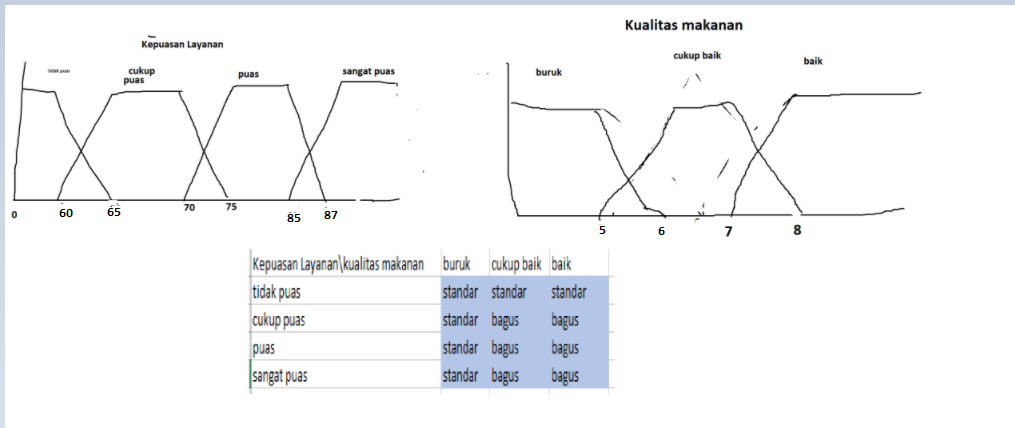

In [ ]:
data = {'Buruk':['Standar','Standar','Standar','Standar'], 
        'Cukup Baik':['Standar','Bagus','Bagus','Bagus'],
        'Baik':['Standar','Bagus','Bagus','Bagus']
        }  
  
# Creates pandas DataFrame.  
fuzzyRule = pd.DataFrame(data, index =['Tidak Puas', 'Cukup Puas', 'Puas', 'Sangat Puas'])  

In [ ]:
fuzzyRule

In [ ]:
# fuzzyRule['Cukup Baik']['Cukup Puas']

In [ ]:
def kombinasiData(dataKepuasanLayanan,dataKualitasMakanan):
  list = []
  # membuat hasil kombinasi setiap data di kualitas makanan terhadap data kepuasan layanan
  for i in range(len(dataKepuasanLayanan)):
    for j in range(len(dataKualitasMakanan)):
      if dataKualitasMakanan[j][1]>dataKepuasanLayanan[i][1]:
        list.append([dataKepuasanLayanan[i][1],fuzzyRule[dataKualitasMakanan[j][0]][dataKepuasanLayanan[i][0]]]) # pemilihan output berdasarkan nilai_rendah,fuzzyRule
      else:
        list.append([dataKualitasMakanan[j][1],fuzzyRule[dataKualitasMakanan[j][0]][dataKepuasanLayanan[i][0]]])
  return list

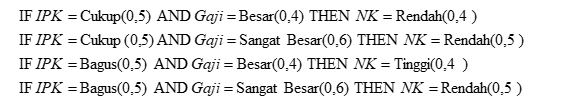

Hanya Contoh

In [ ]:
def inference(dataKepuasanLayanan,dataKualitasMakanan):
  listData = kombinasiData(dataKepuasanLayanan,dataKualitasMakanan)

  
  sama = True
  cek = listData[0][1]
  for i in range(1,len(listData)):
    if cek != listData[0][1]:
      sama = False
  
  if sama==True:
    listData.sort(reverse=True)
    if listData[0][1] == 'Bagus':
      return 0.0,listData[0][0] # nilai terbaik standar,bagus
    else:
      return listData[0][0],0.0 # nilai terbaik standar,bagus
  else:
    nilaiStandar = 0
    nilaiBagus = 0

    for i in range(len(listData)):
      if listData[i][1] == 'Standar' and listData[i][0]>nilaiStandar:
        nilaiStandar = listData[i][0]
      elif listData[i][1] == 'Bagus' and listData[i][0]>nilaiBagus:
        nilaiBagus = listData[i][0]

    return nilaiStandar,nilaiBagus
  

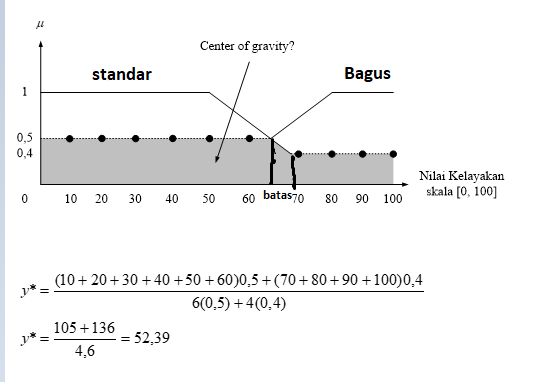

In [ ]:
-y(d-c)+d=x

In [ ]:
def defuzzification(nilaiStandar,nilaiBagus):
  batasStandar = -nilaiStandar*(80-50)+80
  batasBagus = -nilaiBagus*(80-50)+80

  sumStandar = []
  sumBagus = []

  for i in range(1,int(batasStandar)):
    sumStandar.append(i-0.5)
    sumStandar.append(i)

  i = 100
  while i>batasBagus:
    sumBagus.append(i-0.5)
    sumBagus.append(i)
    i-=1
  
  hasil = (sum(sumStandar)*nilaiStandar + sum(sumBagus)*nilaiBagus)/(len(sumStandar)*nilaiStandar + len(sumBagus)*nilaiBagus)

  return hasil

# **Main Program**

In [ ]:
tempDataFuzzy = []

for i in range(len(df)):
  kepuasan_layanan = df['pelayanan'][i].copy()
  kualitas_makanan = df['makanan'][i].copy()
  kepuasan_layanan,kualitas_makanan = fuzzyfikasi(kepuasan_layanan,kualitas_makanan)
  kepuasan_layanan,kualitas_makanan = inference(kepuasan_layanan,kualitas_makanan)
  tempDataFuzzy.append(defuzzification(kepuasan_layanan,kualitas_makanan))

In [ ]:
df['fuzzy'] = tempDataFuzzy

In [ ]:
df

,id,pelayanan,makanan,fuzzy
0,1,58,7,24.75
1,2,54,1,24.75
2,3,98,2,24.75
3,4,52,4,24.75
4,5,11,4,24.75
5,6,59,10,24.75
6,7,61,8,27.75
7,8,30,10,24.75
8,9,45,1,24.75
9,10,36,9,24.75


In [ ]:
df.sort_values(by=['fuzzy','pelayanan','makanan'], ascending=False,inplace=True)

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df

,id,pelayanan,makanan,fuzzy
0,69,86,10,82.75
1,95,63,8,81.25
2,31,74,9,78.25
3,54,64,10,78.25
4,24,100,9,75.25
5,42,94,10,75.25
6,79,87,9,75.25
7,16,82,6,75.25
8,22,79,9,75.25
9,60,79,6,75.25


In [ ]:
id_restoran_terbaik = [id for id in df['id'][:10]] # 10 restoran terbaik
id_restoran_terbaik

[69, 95, 31, 54, 24, 42, 79, 16, 22, 60]